<a href="https://colab.research.google.com/github/jash-ai/PYTHON/blob/main/Copy_of_01_a_bit_more_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![DSL_logo](https://github.com/BrockDSL/Python_2.0_Workshop/blob/master/dsl_logo.png?raw=1)


# Data Science with Python!

Welcome to the Digital Scholarship Lab Level 2 Python workshop. Before proceeding please make sure you've completed [part 1](https://brockdsl.github.io/Intro_to_Python_Workshop/) 

Which covers:
- variables
- math
- conditional
- loops
- functions


What we'll learn today is:
- importing libraries
- analyzing data with pandas
- plotting data with matplotlib


We'll be using Python as a Data Analysis tool
This is how the [Kaggle](https://kaggle.com) website works



Before we get going the next cell should look totally familar to you

In [1]:
##functions are great
scores = [3,5,6,2,1,6] ##list of int values

def find_mean(scores): ##define a function called find_mean
                        ## passing in scores
    sum = 0
    for s in scores:
        sum = sum + s
        
    return sum/len(scores) ##value of all the numbers here a mean


print(find_mean(scores)) ##print the numbers values

3.8333333333333335


----

## Importing Libraries

- Our end goal is to re-use as much code as possible
- To do this we load in different Libraries using the `import` command
- For this example we want to load in the [statistics](https://docs.python.org/3/library/statistics.html) library


In [3]:
#library called import statistics

import statistics

print(statistics.mean(scores))
print(statistics.median(scores))
print(statistics.mode(scores))


3.8333333333333335
4.0
6


## Question time

Try Q1 - Q2 below and type "Got it" in the chat when you are done.

- **Q1** We can use the [math](https://docs.python.org/3/library/math.html) library to do interesting calculations, but we need to import it first. Eg. the function that performs that finds the square root of a number is called `math.sqrt()` Modify the following code to print out the square root of the variable `number`.

In [5]:
import math
#number =81 original value shown
number = math.sqrt(81) ##find sqrt root of number 9*9=81

print(number) ##output 9.0

9.0


- **Q2** The `str` library is so important that it is included all the time Python runs. Try to print the contents of the variable `all_caps` to the screen in lower case letters. You can use `str.lower()` function on a string variable to do this. Modify the following code so that it prints out in lowercase. (Details on the [str](https://docs.python.org/3/library/string.html) library, if your interested)

In [8]:
#all_caps = "HELLO" original value shown
all_caps = str.lower("HELLO") ##added str.lower
print(all_caps)

hello



# EXERCISE: Analyzing Data

![sick](https://upload.wikimedia.org/wikipedia/commons/9/97/Caladrius2.jpg)

We'll be focusing on data analysis for the rest of this workshop so let's import some libraries: [pandas](https://pandas.pydata.org/), and [matplotlib](https://matplotlib.org)

We'll be exploring how to do analysis with a riff of a data set taken from [Kaggle](https://www.kaggle.com/carlolepelaars/toy-dataset/). It has been localized with Canadian Cities and shortened a tad. 

You can explore the [file](https://lite.datasette.io/?csv=https://raw.githubusercontent.com/BrockDSL/SQL-Workshop/main/illness.csv) in a separate browser.

---

![excel preview](https://raw.githubusercontent.com/BrockDSL/Python_2.0_Workshop/master/data_in_excel.png)

You could use Excel to do some of this analysis true, but if you have a large dataset, using Excel is going to be difficult to work with.


The data has 5 columns
- _City_ is a Canadian Cities
- _Gender_ is the self reported gender of the person
- _Age_ is a integer that represents how old the person in in the record is
- _Income_ the annual salary of the person as an integer
- _ill_ a 'Yes' or 'No' to indicate if the person is suffering from our mystery illness



We want to explore the data to see if we can pick up any insights about who is ill and who is not ill. In part 3 of this workshop we will use machine learning to see if we can make predictions with the data.


In [10]:
#each row has data for the 5 columns shown above
##EDA = EXPLORATORY DATA ANALYSIS

- **Q3** What types of questions might we want to ask from the data? Provides some ideas in the Zoom chat box

## Loading the Libraries

To get everything ready we need to load the following cell

In [12]:
#Load the Library Pandas, that works with data Alias as pd
import pandas as pd

#Load the Library Numpy, that works with numerical calculations
import numpy as np

#These two libraries are often used together!

print("Libraries loaded!")

Libraries loaded!


## Loading the data

- We'll load the data into a pandas `dataframe`. ([More Info](https://realpython.com/pandas-dataframe/)) A dataframe has a lot of properties we can use.
- This data is complete, so we don't need to worry about incomplete rows in our observations
- We'll take a look at the first 10 lines of the dataset

In [13]:
#Load the file into a dataframe using the pandas read_csv function
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are by passing along a list of that information
#set the column names for the data
data.columns = ["city","gender","age","income","ill"]

#Show the first 10 lines
data.head(10)

,city,gender,age,income,ill
0,Montreal,Male,41,40367,No
1,Montreal,Male,54,45084,No
2,Montreal,Male,42,52483,No
3,Montreal,Male,40,40941,No
4,Montreal,Male,46,50289,No
5,Montreal,Female,36,50786,No
6,Montreal,Female,32,33155,No
7,Montreal,Male,39,30914,No
8,Montreal,Male,51,68667,No
9,Montreal,Female,30,50082,No


Pandas can provide us some nice quantitative details about our data by calling the `describe()` function

In [14]:
##.describe() give the stats for numerical columns type int, float ie age and income
##different functions min,mean,max,count etc
data.describe()

,age,income
count,150000.000000,150000.000000
mean,44.950200,91252.798273
std,11.572486,24989.500948
min,25.000000,-654.000000
25%,35.000000,80867.750000
50%,45.000000,93655.000000
75%,55.000000,104519.000000
max,65.000000,177157.000000


## Grouping and  Counting

- We can also gather the entries we need by grouping them together with the `.groupby()` function. We can chain these things together to ask very specific questions of the data.
- We pass what column we'd like to group the data by
- We add `.count()` if we are just interested in the counts and not the dataframe


How many people are `ill`?

In [15]:
data.groupby("ill")

In [16]:
##count on the  ill column and group by
data.groupby("ill").count()

,city,gender,age,income
ill,,,,
No,137861,137861,137861,137861
Yes,12139,12139,12139,12139


Try questions Q4 & Q5 below and type "Finished!" in the chat box when you are done

- **Q4** How many people are `Male` in this dataset?

In [29]:

data.groupby("gender").count()

,city,age,income,ill
gender,,,,
Female,66200,66200,66200,66200
Male,83800,83800,83800,83800


- **Q5** How many different cities are in the dataset?

In [30]:
data.groupby("city").count()

,gender,age,income,ill
city,,,,
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Montreal,19707,19707,19707,19707
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Waterloo,14219,14219,14219,14219


# Square brackets, parentheses, and curly braces

One of the things I hear the most from people first learning Python is, 'when should I use brackets, when should I use braces' The best way I can answer that is with the following:

- ` ( ) ` round brackets, or parentheses, when dealing with functions
- ` [ ] ` square brackets when dealing with lists. eg. all the parameters we pass to dataframes are lists
- ` { } ` when we are dealing with dictionaries

These are general rules but they should work ok for about 95% of the cases you'll encounter.


In [31]:
##show only the city column
data.groupby("city")["city"].count()

city
Edmonton     12292
Halifax       8301
Montreal     19707
Ottawa        8120
Regina        4881
Toronto      50307
Vancouver    32173
Waterloo     14219
Name: city, dtype: int64



## Grouping and applying functions

- If we want to do some math on the data we need to cluster it together a bit. We use `.groupby()` and then apply our mathematical functions to the result
- Here we'll use the following 3 functions:
 - `mean()` finds the arithmetic mean of the data
 - `max()` finds the largest occurence of data in that column
 - `min()` finds the smallest occurennce of data in that column


What is the average income of people in `Waterloo`?

In [32]:
data.groupby("city")["income"].mean()

city
Edmonton      90277.513423
Halifax       91554.571497
Montreal      45252.231187
Ottawa        70991.612808
Regina       100756.209178
Toronto       96857.131393
Vancouver     95264.155410
Waterloo     135078.415782
Name: income, dtype: float64

Try questions Q6-Q8 and type "All done" into the chat when you are finished"

- **Q6** What is the average age of people in each `city`?

In [41]:
data.groupby("city")["age"].mean()

city
Edmonton     44.651237
Halifax      45.197807
Montreal     45.058761
Ottawa       44.802709
Regina       44.965171
Toronto      44.922118
Vancouver    44.994094
Waterloo     44.992756
Name: age, dtype: float64

- **Q7** What is the minimum age seen in the data?

In [42]:
data.groupby("city")["age"].min()

city
Edmonton     25
Halifax      25
Montreal     25
Ottawa       25
Regina       25
Toronto      25
Vancouver    25
Waterloo     25
Name: age, dtype: int64

In [43]:
data["age"].min()

25

- **Q7, part 2** What is the maximum age seen in the data?

In [37]:
data.groupby("city")["age"].max()

city
Edmonton     65
Halifax      65
Montreal     65
Ottawa       65
Regina       65
Toronto      65
Vancouver    65
Waterloo     65
Name: age, dtype: int64

In [44]:
data["age"].max()

65

- **Q8** What is the maximum income seen in the data?

In [38]:
data.groupby("city")["income"].max()

city
Edmonton     132302
Halifax      132348
Montreal      91479
Ottawa       107704
Regina       140190
Toronto      147170
Vancouver    141249
Waterloo     177157
Name: income, dtype: int64

In [45]:
data["income"].max()

177157

- **Q8, part 2** What is the minimum income seen in the data?

In [39]:
data.groupby("city")["income"].min()

city
Edmonton     50602
Halifax      48425
Montreal      -654
Ottawa       33335
Regina       64941
Toronto      55538
Vancouver    51131
Waterloo     95202
Name: income, dtype: int64

In [46]:
data["income"].min()

-654

# Sorting & Multi line commands

- We can apply sorting to our dataframe actions by using the funciton `.sort_values()`
- We need to give what column we'd like to sort it with `by =`
- We also need to tell it to display it in an increase way `ascending = False`

What city has the most `ill` people? Here we do it in two steps

In [48]:
##new df called by_city
by_city = data.groupby("city").count()

##another df called sorted_city largest to smallest ascending = false
sorted_city = by_city.sort_values(by = "ill",ascending = False)

##output of sorted_city
sorted_city

,gender,age,income,ill
city,,,,
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Montreal,19707,19707,19707,19707
Waterloo,14219,14219,14219,14219
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881


We could also do it in one step:

In [67]:
##same as above but in 1 line
data.groupby("city").count().sort_values(by = "ill",ascending = False)

,gender,age,income,ill
city,,,,
Toronto,50307,50307,50307,50307
Vancouver,32173,32173,32173,32173
Montreal,19707,19707,19707,19707
Waterloo,14219,14219,14219,14219
Edmonton,12292,12292,12292,12292
Halifax,8301,8301,8301,8301
Ottawa,8120,8120,8120,8120
Regina,4881,4881,4881,4881


## Unique entries & values counts

- Here we use `.unique()` to only give the first instances of the item. Results are returned as a list, which is useful for us later
- This is useful for seeing how many values are in a categorical column

In [50]:
##unique values in the city column
data["city"].unique()

array(['Montreal', 'Toronto', 'Vancouver', 'Waterloo', 'Halifax',
       'Ottawa', 'Regina', 'Edmonton'], dtype=object)

What are unique values for the `age` field?

In [51]:
##unique values in the age column
data["age"].unique()

array([41, 54, 42, 40, 46, 36, 32, 39, 51, 30, 48, 47, 61, 43, 27, 38, 35,
       57, 33, 58, 64, 44, 34, 45, 55, 63, 59, 26, 56, 62, 31, 49, 53, 29,
       28, 25, 37, 65, 60, 50, 52])

SyntaxError: ignored

- To get total number of unique values and frequency in the data we use `value_counts()` 

In [55]:
data["city"].value_counts()

Toronto      50307
Vancouver    32173
Montreal     19707
Waterloo     14219
Edmonton     12292
Halifax       8301
Ottawa        8120
Regina        4881
Name: city, dtype: int64

- To get just the number of entries we use `nunique()`

In [56]:
data["city"].nunique()

8

## Selecting subsets of data

- To make life easier we can create dataframes that just have the values we are interested in
- This is a bit more complicated but follows this type of pattern:

```

dataframe[  dataframe[search criteria]  ]


```

- We are basically creating a subset of the dataframe by matching all entries that match `search criteria`
- That search criteria can be anything that is a conditional
- Doing this gives you a new dataframe

EG. A new dataframe of people with an income over $100000

In [60]:
##each row of dataframe where income is >10000
over_100k = data[data["income"] > 100000]
over_100k

,city,gender,age,income,ill
19707,Toronto,Male,49,112226,No
19708,Toronto,Male,42,110534,No
19709,Toronto,Female,61,100665,No
19713,Toronto,Male,38,120288,No
19716,Toronto,Female,39,105036,No
...,...,...,...,...,...
149977,Edmonton,Male,51,107123,No
149978,Edmonton,Male,58,100949,No
149994,Edmonton,Female,37,106097,No
149997,Edmonton,Male,26,111885,No


EG. If we want the count of people over 100k, we apply the `.count()` function to what we selected

In [59]:
over_100k.count()

city      51845
gender    51845
age       51845
income    51845
ill       51845
dtype: int64

This can be done in 1 line as well

In [61]:
data[data["income"] > 100000].count()

city      51845
gender    51845
age       51845
income    51845
ill       51845
dtype: int64

Try Q9-Q10 below and type "I got it" into the chat when you are done

- **Q9** Can you make a new dataframe that just has people from `Waterloo` in it. Display the first 5 entries.

In [64]:
##column = city where = waterloo
waterloo_people = data[data["city"] == "Waterloo"]
waterloo_people.head(5)

,city,gender,age,income,ill
102187,Waterloo,Male,31,150367,No
102188,Waterloo,Female,36,130426,No
102189,Waterloo,Female,42,130216,No
102190,Waterloo,Male,62,143263,No
102191,Waterloo,Female,48,152273,No


- **Q10** Can you 'describe' the newly created dataframe, to get some basic information on the columns in the dataframe?

In [65]:
waterloo_people.describe()

,age,income
count,14219.000000,14219.000000
mean,44.992756,135078.415782
std,11.562080,11227.302304
min,25.000000,95202.000000
25%,35.000000,127482.000000
50%,45.000000,135220.000000
75%,55.000000,142738.500000
max,65.000000,177157.000000


# Some questions now

Let's first make a dataframe of all of the ill people

In [73]:
ill_people = data[data["ill"] == "Yes"]
ill_people

,city,gender,age,income,ill
10,Montreal,Female,48,41524,Yes
17,Montreal,Male,38,46373,Yes
23,Montreal,Female,27,34292,Yes
29,Montreal,Male,45,47421,Yes
38,Montreal,Female,61,39881,Yes
...,...,...,...,...,...
149847,Edmonton,Female,52,64716,Yes
149886,Edmonton,Male,64,113221,Yes
149936,Edmonton,Male,35,102931,Yes
149949,Edmonton,Male,28,93950,Yes


Try answering Q11 - Q14, type "Finished" into the chat when you are done

- **Q11** Can you display how many people are ill in each city by using a `groupby()` on the `ill_peopple` dataset?

In [72]:
ill_people_city = ill_people.groupby("city").count()
ill_people_city

,gender,age,income,ill
city,,,,
Edmonton,1011,1011,1011,1011
Halifax,686,686,686,686
Montreal,1613,1613,1613,1613
Ottawa,668,668,668,668
Regina,394,394,394,394
Toronto,4021,4021,4021,4021
Vancouver,2568,2568,2568,2568
Waterloo,1178,1178,1178,1178


- **Q12** Can you display how many people are ill in each city using a `groupby()` and sorting by highest number of ill people to the lowest number of illl people in the `ill_people` dataset? 

In [79]:
ill_people_city = ill_people.groupby("city").count().sort_values(by = "ill",ascending = False)
ill_people_city

,gender,age,income,ill
city,,,,
Toronto,4021,4021,4021,4021
Vancouver,2568,2568,2568,2568
Montreal,1613,1613,1613,1613
Waterloo,1178,1178,1178,1178
Edmonton,1011,1011,1011,1011
Halifax,686,686,686,686
Ottawa,668,668,668,668
Regina,394,394,394,394


In [85]:
ill_people.describe()

,age,income
count,12139.000000,12139.000000
mean,45.020842,91277.875360
std,11.554130,25094.894386
min,25.000000,-654.000000
25%,35.000000,80796.000000
50%,45.000000,93779.000000
75%,55.000000,104672.500000
max,65.000000,166458.000000


- **Q13** What is the average age of people in the `ill_people` dataset?

In [84]:
ill_people_city = ill_people.groupby("age").mean()
ill_people_city

,income
age,
25,95165.594771
26,90324.937107
27,92464.967949
28,90958.667808
29,90821.557325
30,90460.492308
31,93397.722408
32,90637.593443
33,91760.673267


- **Q14** What percentage of people in the `ill_people` dataset have a salary over $100000. (This is probably the most complex question of the day, feel free to take as much time as you need to answer it. Remember you can use `(` & `)` to make sure calculations are done in certain order and the python symbol for division is `/`.)

In [105]:
ratio = ill_people[ill_people["income"]> 100000]["ill"].count()/ill_people["income"].count()
ill_people_percent = ratio * 100
print(ill_people_percent)

35.06878655572947


In [ ]:
ratio = ill_people(ill_people["income"]> 1000000.coun()/
ill_people_percent = ratio * 100
print(ill_people_percent)

SyntaxError: ignored

## One brief statistical digression

Before we change gears to look at how we can visualize some of this data, let's just take a look at a (admittedly) more complex piece on analysis just to demonstrate how much heaving lifing Pandas can do for us.

We are just going to create a [Correlation Matrix](https://en.wikipedia.org/wiki/Correlation#Correlation_matrices). This will basically tell us how strongly each column influences on another.

In [87]:
#Reload our data
data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are by passing along a list of that information
data.columns = ["city","gender","age","income","ill"]

#Change our ill_data to a number so the analysis will pick it up
data["ill"].replace({"No":0, "Yes":1},inplace=True)

#First the correlation matrix directly from pandas
data.corr()


,age,income,ill
age,1.000000,-0.001318,0.001811
income,-0.001318,1.000000,0.000298
ill,0.001811,0.000298,1.000000


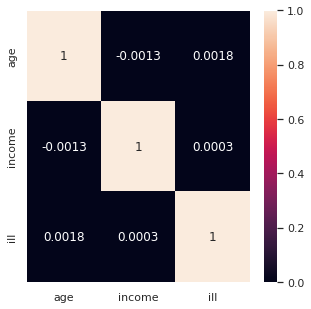

In [91]:
#We'll be using the Seaborne library (https://seaborn.pydata.org/) here 
#as it has a great corr matrix visualization
import seaborn as sn

sn.set(rc={'figure.figsize':(5,5)})
sn.heatmap(data.corr(), annot=True)
plt.show()

If you've never seen on of these below, this basically tell us there is no strong correlation between our columns of data. So if continue to keep digging into the numbers we are not likely to find any interesting statistical nuggets. 

# Another Library, MatplotLib

Let's take a look at graphing our results. We can use the `matplotlib` library to generate some graphs of our results. We always gives lists as parameters for the graphs


In [90]:
#This line is for Jupyter's benefit
%matplotlib inline
#Import MayPlotLib to graph some results
import matplotlib.pyplot as plt

print("Additional Libraries are loaded and ready!")

Additional Libraries are loaded and ready!


Let's reload our data into a new dataframe

In [92]:
#Load the file
graph_data = pd.read_csv("https://brockdsl.github.io/Python_2.0_Workshop/canadian_toy_dataset.csv")

#Tell it what our columns are
graph_data.columns = ["city","gender","age","income","ill"]

print("Data loaded!")

Data loaded!


## Pie Graphs

Let's draw a pie graph of the number of people that are `ill` versus people that are not ill. We create smaller data frames that match a selection criteria. In the first case, only people with the `ill` column set to `yes`, line 2. In the second case only people with the `ill` column set to `no`, line 6.

People ill: 12139
People Not ill: 137861


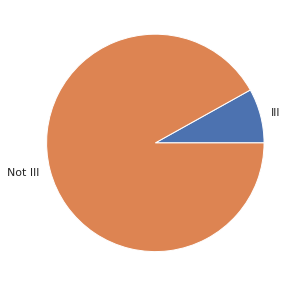

In [95]:
#All of the ill people with only ill column abd ill == Yes
total_ill = graph_data[graph_data["ill"] == "Yes"]["ill"].count()
print("People ill: " + str(total_ill))

#All the people not ill only ill column abd ill == No
total_not_ill = graph_data[graph_data['ill'] == "No"]["ill"].count()
print("People Not ill: "+ str(total_not_ill))


# Matplot lib always wants data in a list, so we'll make one
pie_data = [total_ill,total_not_ill]
pie_labels = ["Ill", "Not Ill"] ##labels
plt.pie(pie_data,labels=pie_labels) ##renders the pie show labels

plt.show() ##show the graph

Try questions Q15  - Q16 and type "Completed" in the chat when you're done.

- **Q15** Can you create a pie graph that shows the gender distribution in the data? You just need to modify line 2 & 5

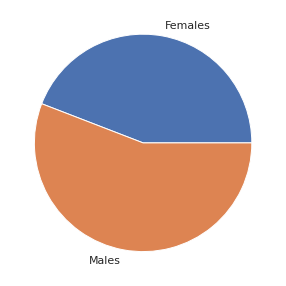

In [106]:
#Fill in the following
females_ill = graph_data[graph_data["gender"] =="Female"]["ill"].count()

#Fill in the following
males_ill = graph_data[graph_data["gender"] =="Male"]["ill"].count()

pie_data = [females_ill,males_ill]
pie_labels = ["Females","Males"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

- **Q16** Can you create a pie graph that shows the how many people in the dataset make over 100000 annual income? You just need to modify line 2 & 5.

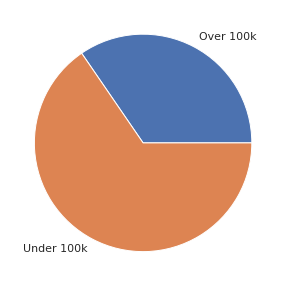

In [102]:
#Fill in the following
over_100k = graph_data[graph_data["income"] > 100000]["income"].count()

#Fill in the following
under_100k = graph_data[graph_data["income"] <= 100000]["income"].count()

pie_data = [over_100k, under_100k]
pie_labels = ["Over 100k","Under 100k"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

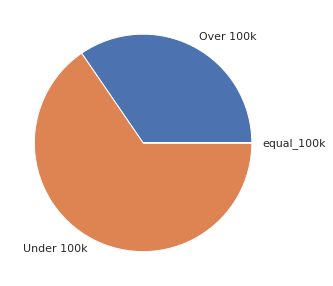

In [108]:
#Fill in the following
over_100k = graph_data[graph_data["income"] > 100000]["income"].count()

#Fill in the following
under_100k = graph_data[graph_data["income"] < 100000]["income"].count()

#Fill in the following
equal_100k = graph_data[graph_data["income"] == 100000]["income"].count()


pie_data = [over_100k, under_100k,equal_100k]
pie_labels = ["Over 100k","Under 100k", "equal_100k"]
plt.pie(pie_data,labels=pie_labels)

plt.show()

# Congrats!

You now know a bit about Python Libraries and using advance features of the Language. Try adding new cells to this page and asking yourself more questions

## Interested in more workshop?

We offer a few other Python workshops that build on what we learned today.

- [Text Analysis with Python](https://brockdsl.github.io/Text_Analysis_with_Python/) - An introduction to the different types of analysis you can perform on text using Python
- [Machine Learning with Python](https://brockdsl.github.io/Machine_Learning_with_Python/) - A very easy introduction to the first step of artificial intelligence programming. 

All of our workshop times are listed on our [Eventbrite](https://brockdsl.eventbrite.com) page.

## Further Reading

- Now that we've handled the basics here are some interesting next steps you can persue.

[Python For Librarians](https://libraryjuiceacademy.com/shop/course/270-python-for-librarians/?attribute_pa_session=2021-05-may) - A four week asynchronous professional development course that examines how to use Python.

[Kaggle](https://www.kaggle.com/) - An online portal that teaches data science using Notebooks, also has contests for cash prizes

[Python the Hard Way](https://learntocodetogether.com/learn-python-the-hard-way-free-ebook-download/) - Don't let the name fool you, this book is a great introduction to Python and programming more generally

[Data Analysis with Python and Sci Hub](https://brockdsl.github.io/SciHub_Workshop/) - A tutorial on using Python to analyze Sci-Hub data. Similar to what we saw today, but with real data.

[Google Colab FAQ](https://research.google.com/colaboratory/faq.html) - A concise set of questions and answers on how to use the Google Colab environment.

[Thinking in Pandas](https://www.apress.com/gp/book/9781484258385) - A short book that looks at how to use Pandas for analysis.


Have questions about Python and data science. Drop us a line at `dsl @ brocku.ca`

## Extra Question: Automatic Histograms


Say we wanted to plot out the income distribution of our data set as a [historgram](https://en.wikipedia.org/wiki/Histogram) 

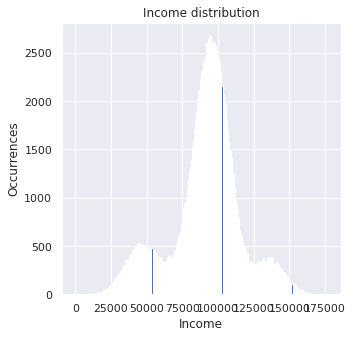

In [109]:
# bins is the number of containers we'll split our x-axis values into
bins = 250

plt.hist(graph_data["income"],bins)

plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Occurrences")

plt.show()

**Q17** Can you draw a histogram of the `age` distribution? Make sure to give it the axes good descriptions. You just need to modify line 1,5, & 6. (The example above should help you) 

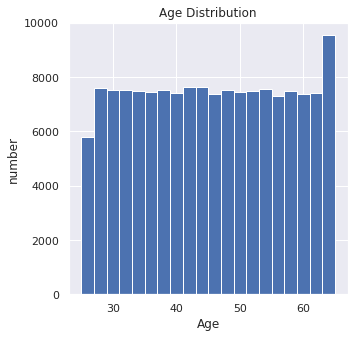

In [111]:
bins = 20 #FILL

plt.hist(graph_data["age"],bins) 
plt.title("Age Distribution")
plt.xlabel("Age") #FILL
plt.ylabel("number") #FILL

plt.show()